In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random as random
random.seed(0)
# create a KNN model for the merged_filtered_data_crc.csv file
# Load the dataset

data = pd.read_csv("merged.csv")
data


,Unnamed: 0.1,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,...,RBKS,LOC100287015,KDM8,DUSP28,ZBTB49,ZNF79,FAM111A-DT,TTLL11,GPR89A,PSPN
0,0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,...,146.0,226.0,225.0,248.0,449.0,220.0,265.0,150.0,173.0,155.0
1,1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,...,196.0,166.0,135.0,309.0,260.0,203.0,286.0,176.0,183.0,287.0
2,2,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,...,196.0,246.0,160.0,267.0,268.0,212.0,171.0,190.0,231.0,225.0
3,3,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,...,138.0,147.0,157.0,170.0,177.0,121.0,222.0,124.0,190.0,247.0
4,4,TCGA-5M-AAT6-01A,3,MSI-H,0.049432,2,1828,WT,SNV,WT,...,129.0,161.0,150.0,106.0,170.0,147.0,145.0,118.0,135.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,...,120.0,239.0,124.0,146.0,194.0,170.0,190.0,206.0,253.0,184.0
431,431,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,...,246.0,184.0,163.0,308.0,408.0,159.0,125.0,100.0,320.0,107.0
432,432,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,...,152.0,605.0,425.0,312.0,268.0,164.0,306.0,265.0,182.0,156.0
433,433,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,...,343.0,616.0,428.0,225.0,177.0,145.0,264.0,213.0,182.0,186.0


In [2]:
def KNN(target_variable='msi_status', test_size=0.2, random_state=42, neighbors=5, do_pca=False, plot_boundary=False):
    y = data[target_variable]
    X = data.drop(target_variable, axis=1)
    le = LabelEncoder()
    # Fit and transform the features
    X = X.apply(le.fit_transform)

    # Apply PCA
    if do_pca != False:
        print("Doing PCA = " + str(do_pca))
        pca = PCA(n_components=do_pca)
        X = pca.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=neighbors)

    # Train the model
    knn.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(Y_test, y_pred)
    print("Accuracy:", accuracy)

    # TODO: fix this crap, error: TypeError: can only concatenate str (not "int") to str, line 41 (plot_decision_regions line)
    if plot_boundary == True:
        Y_train = Y_train.to_numpy()
        y_train_numerical = []
        for i in Y_train:
            if i == 'MSI-H':
                y_train_numerical.append(0)
            elif i == 'MSS':
                y_train_numerical.append(1)
            else:
                y_train_numerical.append(2)
        plot_decision_regions(X_train, np.array(y_train_numerical), clf=knn)  # Adding axes annotations
        plt.xlabel("X")
        plt.ylabel("Y")
        if do_pca != False:
            plt.title(f"Knn with K={str(neighbors)} and PCA={str(do_pca)}")
        else:
            plt.title(f"Knn with K={str(neighbors)}")  # Convert neighbors to string
        plt.show()
    return accuracy

Accuracy for 3 neighbors:
Doing PCA = 2
Accuracy: 0.5517241379310345


Accuracy for 5 neighbors:
Doing PCA = 2
Accuracy: 0.6091954022988506


Accuracy for 7 neighbors:
Doing PCA = 2
Accuracy: 0.632183908045977


Accuracy for 9 neighbors:
Doing PCA = 2
Accuracy: 0.6551724137931034


Accuracy for 11 neighbors:
Doing PCA = 2
Accuracy: 0.6551724137931034


Accuracy for 13 neighbors:
Doing PCA = 2
Accuracy: 0.6551724137931034


Accuracy for 15 neighbors:
Doing PCA = 2
Accuracy: 0.6666666666666666


Accuracy for 17 neighbors:
Doing PCA = 2
Accuracy: 0.6781609195402298


Accuracy for 19 neighbors:
Doing PCA = 2
Accuracy: 0.6896551724137931


Accuracy for 21 neighbors:
Doing PCA = 2
Accuracy: 0.6781609195402298


Accuracy for 23 neighbors:
Doing PCA = 2
Accuracy: 0.6781609195402298


Accuracy for 25 neighbors:
Doing PCA = 2
Accuracy: 0.6896551724137931


Accuracy for 27 neighbors:
Doing PCA = 2
Accuracy: 0.6896551724137931


Accuracy for 29 neighbors:
Doing PCA = 2
Accuracy: 0.6896551724137931

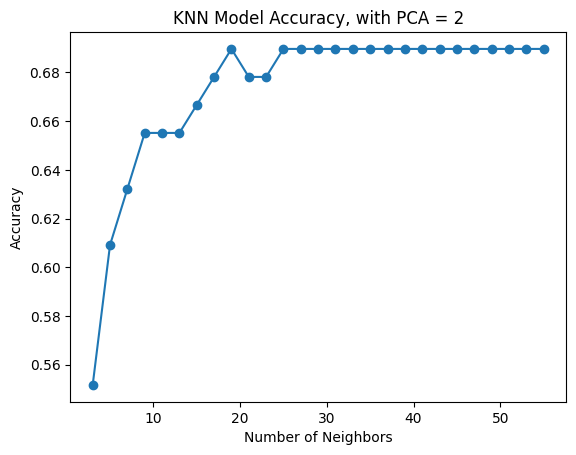

Accuracy for 3 neighbors:
Doing PCA = 7
Accuracy: 0.6666666666666666


Accuracy for 5 neighbors:
Doing PCA = 7
Accuracy: 0.7126436781609196


Accuracy for 7 neighbors:
Doing PCA = 7
Accuracy: 0.7241379310344828


Accuracy for 9 neighbors:
Doing PCA = 7
Accuracy: 0.7241379310344828


Accuracy for 11 neighbors:
Doing PCA = 7
Accuracy: 0.735632183908046


Accuracy for 13 neighbors:
Doing PCA = 7
Accuracy: 0.735632183908046


Accuracy for 15 neighbors:
Doing PCA = 7
Accuracy: 0.735632183908046


Accuracy for 17 neighbors:
Doing PCA = 7
Accuracy: 0.7241379310344828


Accuracy for 19 neighbors:
Doing PCA = 7
Accuracy: 0.7241379310344828


Accuracy for 21 neighbors:
Doing PCA = 7
Accuracy: 0.7126436781609196


Accuracy for 23 neighbors:
Doing PCA = 7
Accuracy: 0.7011494252873564


Accuracy for 25 neighbors:
Doing PCA = 7
Accuracy: 0.7126436781609196


Accuracy for 27 neighbors:
Doing PCA = 7
Accuracy: 0.735632183908046


Accuracy for 29 neighbors:
Doing PCA = 7
Accuracy: 0.7471264367816092




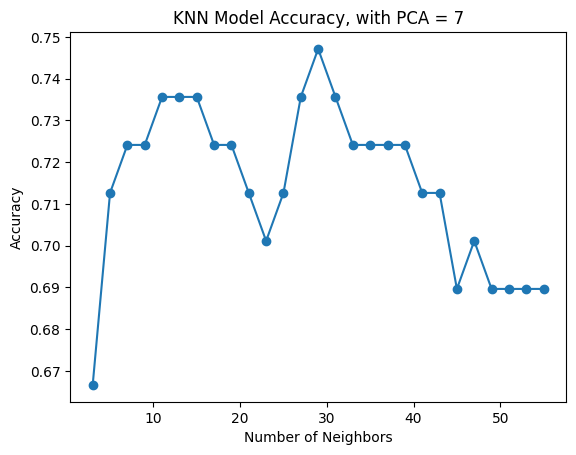

Accuracy for 3 neighbors:
Doing PCA = 12
Accuracy: 0.7126436781609196


Accuracy for 5 neighbors:
Doing PCA = 12
Accuracy: 0.6896551724137931


Accuracy for 7 neighbors:
Doing PCA = 12
Accuracy: 0.6896551724137931


Accuracy for 9 neighbors:
Doing PCA = 12
Accuracy: 0.6896551724137931


Accuracy for 11 neighbors:
Doing PCA = 12
Accuracy: 0.7241379310344828


Accuracy for 13 neighbors:
Doing PCA = 12
Accuracy: 0.735632183908046


Accuracy for 15 neighbors:
Doing PCA = 12
Accuracy: 0.735632183908046


Accuracy for 17 neighbors:
Doing PCA = 12
Accuracy: 0.735632183908046


Accuracy for 19 neighbors:
Doing PCA = 12
Accuracy: 0.7126436781609196


Accuracy for 21 neighbors:
Doing PCA = 12
Accuracy: 0.7126436781609196


Accuracy for 23 neighbors:
Doing PCA = 12
Accuracy: 0.7241379310344828


Accuracy for 25 neighbors:
Doing PCA = 12
Accuracy: 0.7241379310344828


Accuracy for 27 neighbors:
Doing PCA = 12
Accuracy: 0.735632183908046


Accuracy for 29 neighbors:
Doing PCA = 12
Accuracy: 0.74712

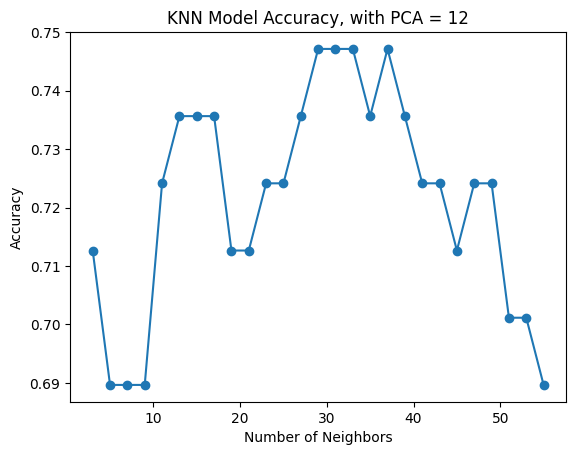

In [3]:
number_of_neighbors = 55
for j in range(2, 16, 5):
    accuracy_scores = []
    neighbour_values = []
    for i in range(3, number_of_neighbors+1, 2):
        print(f"Accuracy for {i} neighbors:")
        accuracy = KNN(neighbors=i, do_pca = j)
        print("\n")
        accuracy_scores.append(accuracy)
        neighbour_values.append(i)


    print(accuracy_scores)
    plt.plot(neighbour_values, accuracy_scores, marker='o')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.title('KNN Model Accuracy, with PCA = ' + str(j))
    plt.show()